In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#import numpy as np
from sklearn.model_selection import cross_validate, train_test_split, learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error


def mse(n, y, y_hat):
    square_diff_sum = 0
    #Here we iterate through the substraction of each element of both lists (y and yhat)
    for diff in (y - y_hat):
        square_diff_sum += diff**2
    #after we obtained the summatory, we apply the rest of the formula
    return ((1 / n) * square_diff_sum)




# Modelo #1

In [24]:
# Importamos la información a utilizar
columns = ["Date", "Precip", "MaxTemp", "MinTemp", "MeanTemp"]
df = pd.read_csv('Summary of Weather.csv', names=columns)
#df.dropna()

# Definimos los valores de las variables independientes y la variable dependiente
X = df[["MinTemp", "MeanTemp"]]
y = df["MaxTemp"]


In [25]:

# Se crea un conjunto para train y uno para test para cada set de datos. 
# Se toma el 30% de los datos para train
# Random state nos permite pasar una semilla para la aleatoreidad
# en la separación
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=1)



In [26]:
# Creamos el modelo como regresión lineal. Fit intercept nos permite indicar si se debe calcular el intercepto.
model = LinearRegression(fit_intercept=True)

# Entrenamos el modelo
model.fit(X_train, y_train)

# Obtenemos los coeficientes del atributo coef_ y el intercepto del atributo intercept
print("MaxTemp = ", model.coef_[0], "*(MinTemp) +", model.coef_[1],
      "*(MeanTemp) + ", model.intercept_)



MaxTemp =  -0.8899741275834361 *(MinTemp) + 1.8820143942100231 *(MeanTemp) +  0.6933299231464183


In [27]:
# Usamos el modelo para predecir sobre nuestro set de pruebas
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

print("El MSE de train es ", mean_squared_error( y_train, train_predict))            
print("El MSE de test es ", mean_squared_error( y_test, test_predict))



El MSE de train es  0.9221266984191295
El MSE de test es  1.1099640074438633


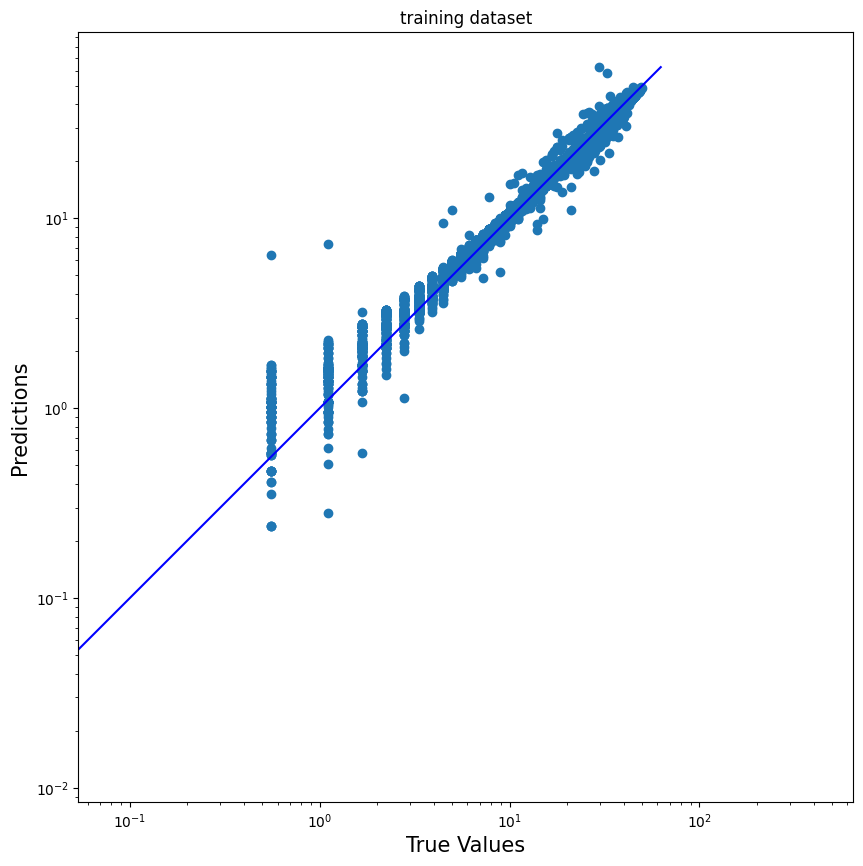

In [36]:
plt.figure(figsize=(10,10))
plt.title("training dataset")
plt.scatter(y_train, train_predict)
plt.yscale('log')
plt.xscale('log')

p1 = max(max(train_predict), max(y_train))
p2 = min(min(train_predict), min(y_train))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

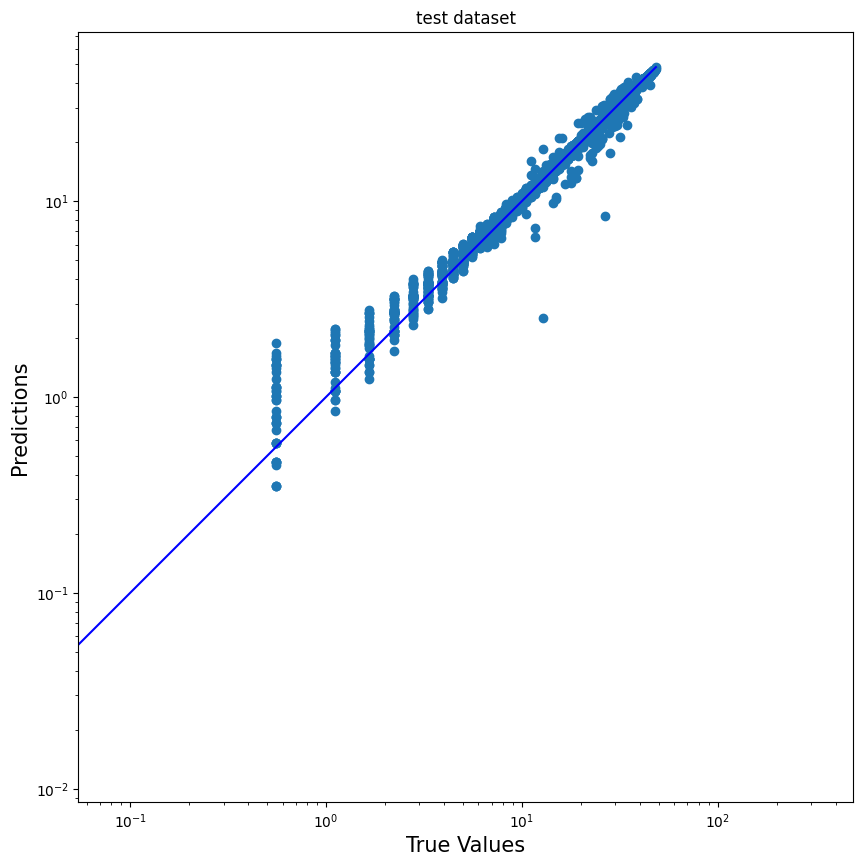

In [37]:
plt.figure(figsize=(10,10))
plt.title("test dataset")
plt.scatter(y_test, test_predict)
plt.yscale('log')
plt.xscale('log')

p1 = max(max(test_predict), max(y_test))
p2 = min(min(test_predict), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [28]:
scoring = "neg_root_mean_squared_error"
linscores = cross_validate(model, X_train, y_train, scoring=scoring, return_estimator=True)
print("Linear regression score:", linscores["test_score"].mean())

Linear regression score: -0.9546874893823597


In [29]:
print(linscores["estimator"][0].intercept_, linscores["estimator"][-1].coef_)

0.6332306204872005 [-0.88020691  1.87205819]


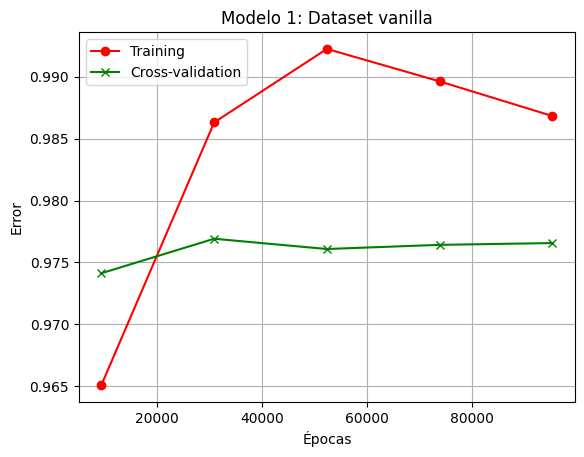

In [30]:
train_sizes, train_scores, test_scores = learning_curve(model, X, y)
# Mean and STD of the train scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
# Mean and STD of the test scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.title("Modelo 1: Dataset vanilla")
plt.plot(train_sizes, train_mean, "o-", color="r", label='Training')
plt.plot(train_sizes, test_mean, "x-", color="g", label='Cross-validation')
plt.xlabel("Épocas")
plt.ylabel("Error")
plt.legend(loc="best")
plt.grid()
plt.show()

## Inicio de modelo #2

<AxesSubplot:>

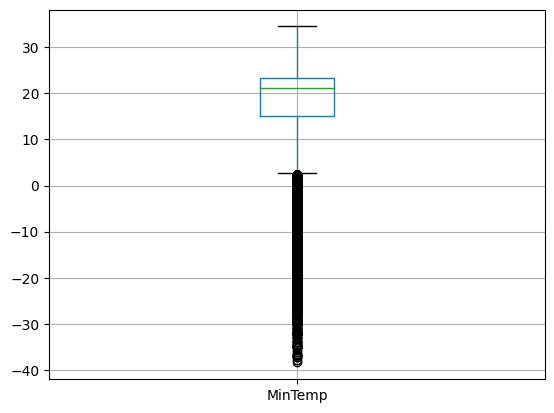

In [40]:
pd.plotting.boxplot(df,"MinTemp")

<AxesSubplot:>

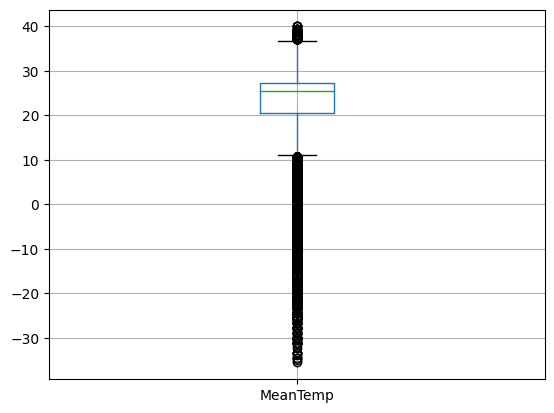

In [41]:
pd.plotting.boxplot(df,"MeanTemp")

In [76]:
from scipy.stats.mstats import winsorize
df2 = df.copy()
df_temp = df2[["MinTemp", "MeanTemp"]]
df2_w = df2.clip(lower=df.quantile(0.05), upper=df.quantile(0.95), axis=1)

df2["MinTemp"] = df2_w["MinTemp"]
df2["MeanTemp"] = df2_w["MeanTemp"]


In [77]:
# Definimos los valores de las variables independientes y la variable dependiente

X2 = df2[["MinTemp", "MeanTemp"]]
y2 = df2["MaxTemp"]


In [78]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=1)



In [79]:
# Creamos el modelo como regresión lineal. Fit intercept nos permite indicar si se debe calcular el intercepto.
model2 = LinearRegression(fit_intercept=True)

# Entrenamos el modelo
model2.fit(X_train2, y_train2)

# Usamos el modelo para predecir sobre nuestro set de pruebas
train_predict2 = model.predict(X_train2)
test_predict2 = model.predict(X_test2)

In [80]:
print("El MSE de train es ", mean_squared_error( y_train2, train_predict2))            
print("El MSE de test es ", mean_squared_error( y_test2, test_predict2))



El MSE de train es  0.9637526721514528
El MSE de test es  1.0373787670269368


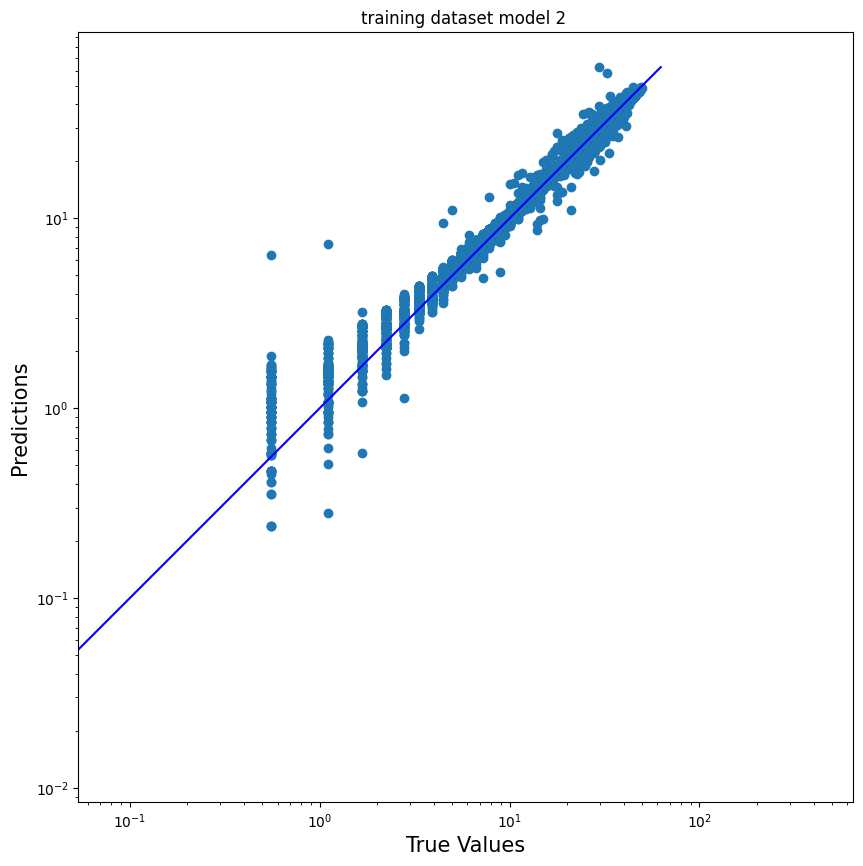

In [81]:
plt.figure(figsize=(10,10))
plt.title("training dataset model 2 ")
plt.scatter(y_train2, train_predict2)
plt.yscale('log')
plt.xscale('log')

p1 = max(max(train_predict2), max(y_train2))
p2 = min(min(train_predict2), min(y_train2))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

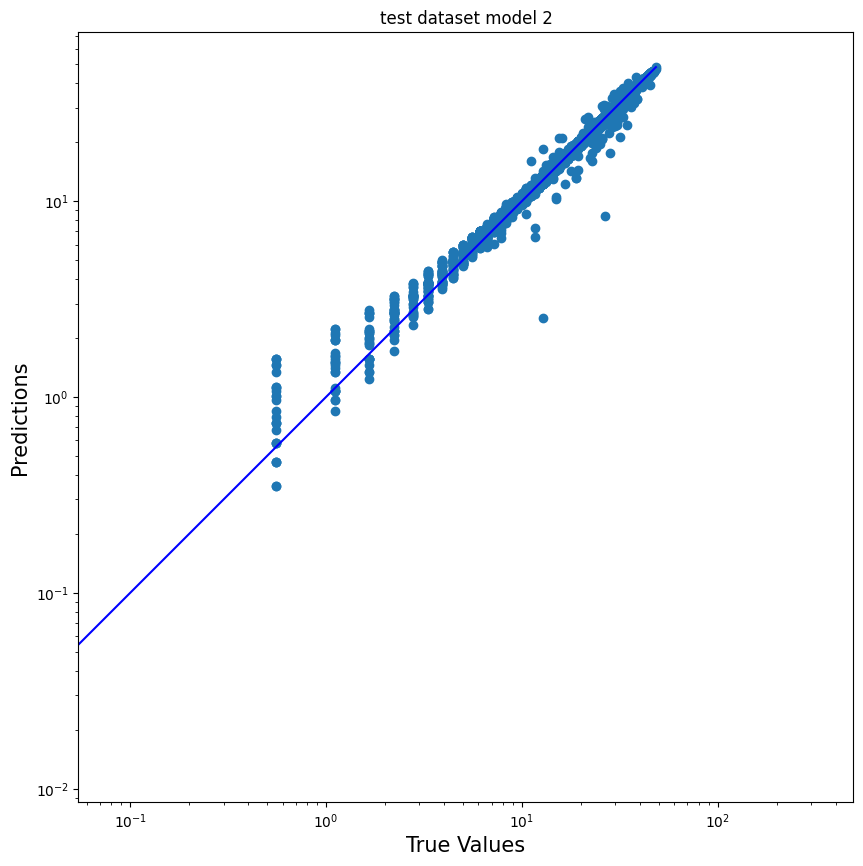

In [82]:
plt.figure(figsize=(10,10))
plt.title("test dataset model 2")
plt.scatter(y_test2, test_predict2)
plt.yscale('log')
plt.xscale('log')

p1 = max(max(test_predict2), max(y_test2))
p2 = min(min(test_predict2), min(y_test2))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

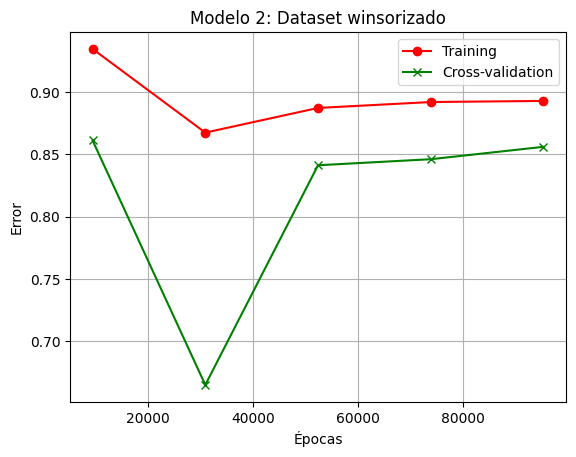

In [83]:
train_sizes2, train_scores2, test_scores2 = learning_curve(model2, X2, y2)
# Mean and STD of the train scores
train_mean2 = np.mean(train_scores2, axis=1)
train_std2 = np.std(train_scores2, axis=1)
# Mean and STD of the test scores
test_mean2 = np.mean(test_scores2, axis=1)
test_std2 = np.std(test_scores2, axis=1)
plt.title("Modelo 2: Dataset winsorizado")
plt.plot(train_sizes2, train_mean2, "o-", color="r", label='Training')
plt.plot(train_sizes2, test_mean2, "x-", color="g", label='Cross-validation')
plt.xlabel("Épocas")
plt.ylabel("Error")
plt.legend(loc="best")
plt.grid()
plt.show()